 **Machine Learning Project: Frequency of Newspaper Reading Through the Years**                              
*Professor Terence Johnson                    
Nina Ysabel Alinsonorin & Daphne Pfoser (Group 6)*

**Cleaning**

In [ ]:
import pandas as pd
import numpy as np

news = pd.read_csv('/content/GSS (1).csv')
news = news.pivot(index='id_', columns='year', values='news').reset_index() # pivot so that each year is its own column
news = news.drop([1973, 1974, 1976, 1980, 1984], axis = 1) # dropping years which weren't included in GSS study
news = news[news >= 0] # drop all negative values
news = news.fillna(0.0) # fill na values with 0.0 for coding purposes (can't drop na's without dropping whole columns)

years = [1972, 1975, 1977, 1978, 1982, 1983, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2021, 2022]
all_counts = [] # stores the counts 1-5s for each year

for year in years:
    counts = news[year].value_counts() # value_counts() will count how many unique values are from the no_nas_news (so from all the years)
    year_counts = {"Year": year} # year_counts stores the counts for each year

    for i in range(1, 6): # have the numbers 1 - 5 stored in i
        year_counts[i] = counts.get(i, 0) # checks the counts to see if it will have a count, if not it gets a 0

    all_counts.append(year_counts) # collects the counts for all the years

news = pd.DataFrame(all_counts)

# Pivot the DataFrame to reverse rows and columns
news = news.melt(id_vars=['Year'], var_name='Value', value_name='Count')
news = news.pivot(index='Value', columns='Year', values='Count')

# Reset the index
news = news.reset_index()
#news = news.astype('int64')
print(news)

Year  Value  1972  1975  1977  1978  1982  1983  1985  1986  1987  ...  2004  \
0         1  1105   981   952   874   961   891   807   789   949  ...   358   
1         2   241   235   254   308   425   331   324   289   391  ...   222   
2         3   128   126   148   154   218   170   196   184   231  ...   134   
3         4    69    81   100   113   138   127   116   116   130  ...   121   
4         5    68    65    73    79   112    80    87    90   110  ...    71   

Year  2006  2008  2010  2012  2014  2016  2018  2021  2022  
0      945   431   449   353   417   398   312   642   383  
1      611   300   277   230   260   270   174   361   267  
2      418   207   215   195   246   229   184   240   195  
3      404   200   220   217   271   300   211   452   329  
4      350   191   269   306   481   688   678  1001  1191  

[5 rows x 30 columns]


<ipython-input-1-61e7531961fe>:26: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  news = news.pivot(index='Value', columns='Year', values='Count')


**Graphing**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cat1= 1 # everyday
cat2 = 2 # a few times a week
cat3 = 3 # once a week
cat4 = 4 # less than once a week
cat5 = 5 # never
var1 = 1972

<ipython-input-4-cdda85c19e81>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = news, x=cat1, hue=var1, clip=(0, None)) # use the clip argument bc without it there is the -200 on the x-axis


Text(0.5, 1.0, 'Read the Newspaper Everyday')

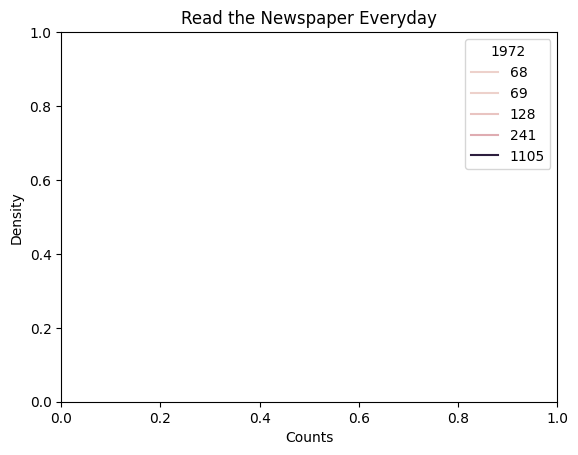

In [ ]:
sns.kdeplot(data = news, x=cat1, hue=var1, clip=(0, None)) # use the clip argument bc without it there is the -200 on the x-axis
plt.xlabel('Counts')
plt.title('Read the Newspaper Everyday')

*Line Plot: Number of People Reading Newspapers Over Time*

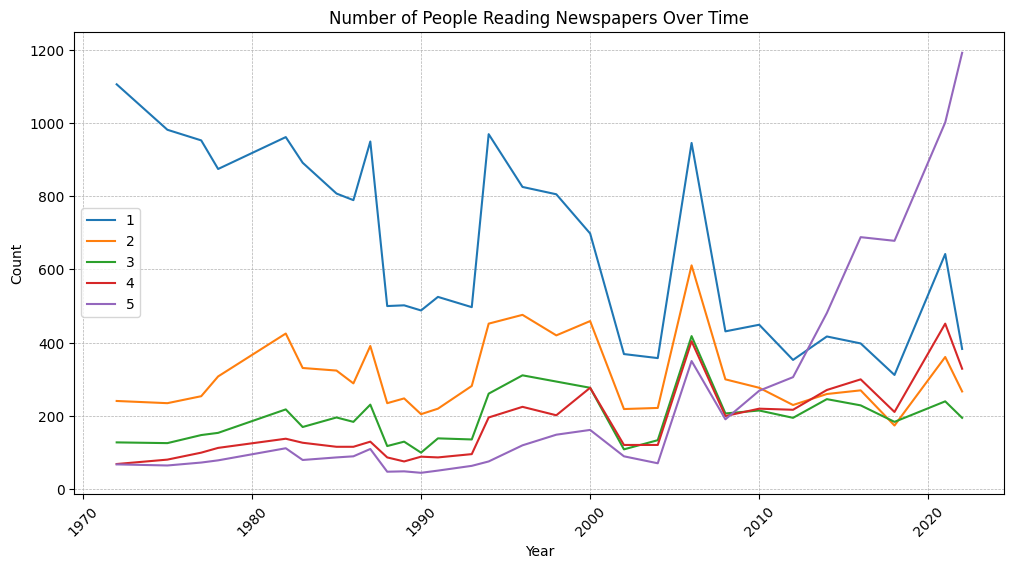

In [ ]:
plt.figure(figsize=(12, 6))

# take out the Value column so you dont graph the frequency categories themselves since the value has the frequency categories
for index, row in news.iterrows(): # create a loop to go through each row of the dataset
    plt.plot(row.index[1:], row.values[1:], label=row['Value']) # plots the data from each row of the years
    # row.index[1:] gets the column names from 2 to the end (years) , row.values[1:] gets the frequency categories,
    # label=row['Value'] sets the label for the line 1-5 ( with the diff colours)

plt.title('Number of People Reading Newspapers Over Time')
plt.xlabel('Year')
plt.ylabel('Count') # number of people
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5) # has the grid lines
plt.xticks(rotation=45)  # rotates x-axis labels

plt.show()


 # the 1-5 are the categories : 1= every day, 2= a few times a week, 3=once a week, 4=less than once a week, and 5= never

*Plot for 1983 group to see decline*

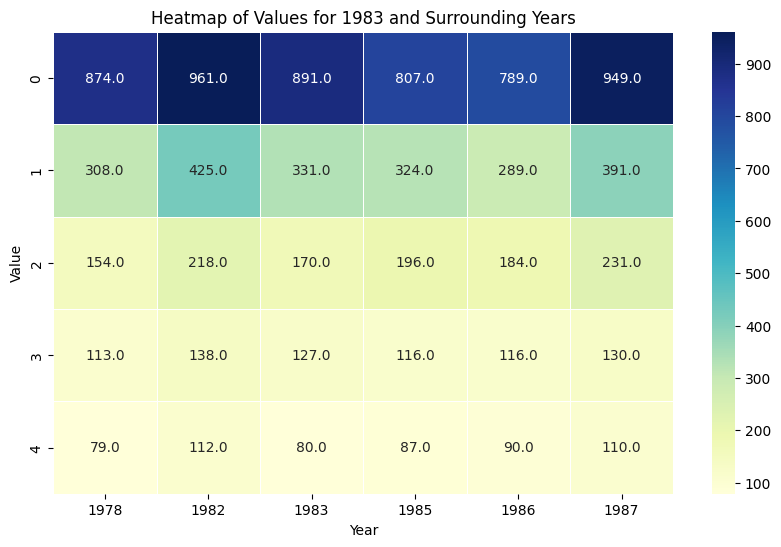

In [ ]:
# have to omit 0.0 and keep 5.0 values
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the relevant data for the years of interest
years = [1978, 1982, 1983, 1985, 1986, 1987]
values = news[years]

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(values, cmap="YlGnBu", annot=True, fmt=".1f", cbar=True, linewidths=0.5)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Heatmap of Values for 1983 and Surrounding Years')
plt.show()

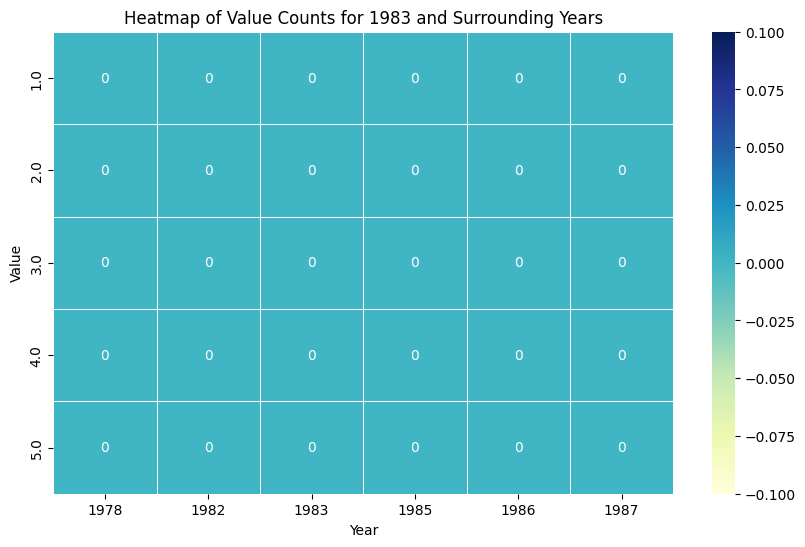

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the years of interest
years = [1978, 1982, 1983, 1985, 1986, 1987]

# Extract the relevant data for the years of interest
values = news[years]

# Count occurrences of values 1.0 - 5.0 for each year
counts = values.apply(lambda x: x.value_counts().reindex([1.0, 2.0, 3.0, 4.0, 5.0], fill_value=0))

# Create a heatmap with years on the x-axis and 'Value' (1.0 - 5.0) on the y-axis
plt.figure(figsize=(10, 6))
sns.heatmap(counts, cmap="YlGnBu", annot=True, fmt="d", cbar=True, linewidths=0.5)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Heatmap of Value Counts for 1983 and Surrounding Years')
plt.show()


*Stacked Area Plot*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

news = news.apply(pd.to_numeric, errors='coerce')
#news.dropna(subset=['Value'], inplace=True)

# Extract data for years before and after 1983
years = [1972, 1975, 1977, 1978, 1982, 1983, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2021, 2022]
data = news[years]

# Create the stacked area plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.stackplot(data.index, data.T, labels=years, alpha=0.7)
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Stacked Area Plot for Years Before and After 1983')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Years')

plt.show()

*Stacked Bar Plot*

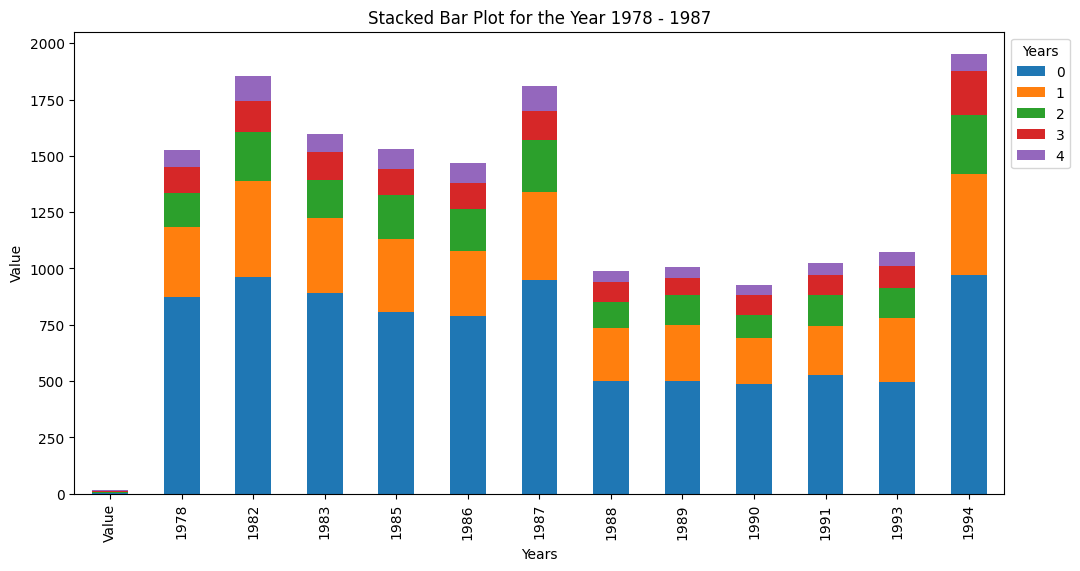

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data cleaning
news = news.apply(pd.to_numeric, errors='coerce')

# Define the years of interest
selected_years = news[['Value', 1978, 1982, 1983, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994]]

# Extract data for these years
data = selected_years

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Transpose the data for a stacked plot
data = data.T

# Create a stacked bar plot
data.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Years')
ax.set_ylabel('Value')
ax.set_title('Stacked Bar Plot for the Year 1978 - 1987')
ax.legend(title='Years', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


KeyError: ignored

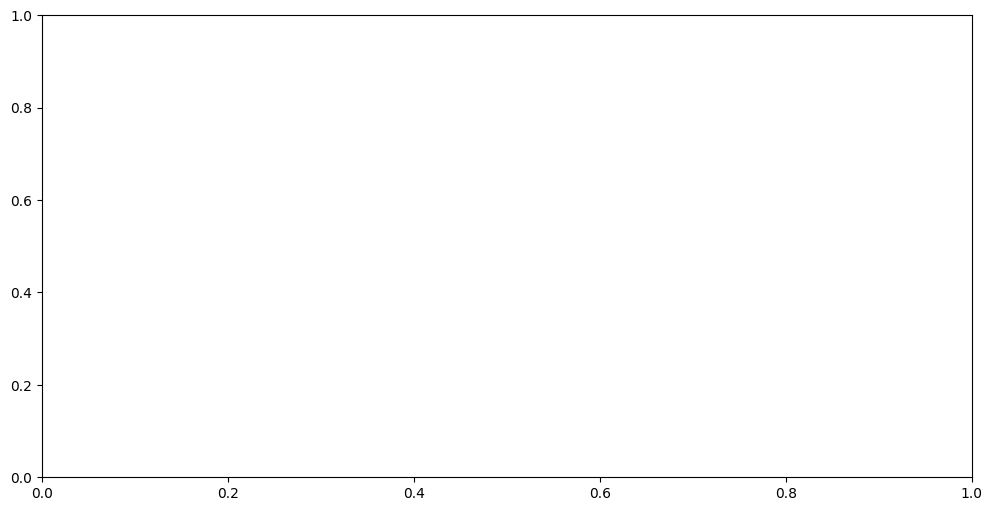

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data cleaning
news = news.apply(pd.to_numeric, errors='coerce')

# Define the years of interest
selected_years = news[[ 1978, 1982, 1983, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994]]

# Filter out the 0 values

# Extract data for these years


# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Transpose the data for a stacked plot


# Create a stacked bar plot
bottom = np.zeros(data.shape[1])  # Initialize the bottom values for the bars

for index, row in data.iterrows():
    plt.bar(data.columns, row, label=row['Value'], bottom=bottom)
    bottom += row  # Update the bottom values

ax.set_xlabel('Years')
ax.set_ylabel('Value')
ax.set_title('Stacked Bar Plot for the Year 1978 - 1987')
ax.legend(title='Value', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


